векторный потенциал вращающейся твердой сферы

$\vec A = \int \frac{\rho\,\vec v}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}dV$

я воспользовался разложением обратного радиус вектора по сферическим гармоникам

Поскольку расстояние между координатами заряда и точки наблюдения ${{R}_{0}}=\left|\overrightarrow{r_{q}} - \overrightarrow{r_{a}}\right|$ находится в знаменателе, то в сферической системе координат можно применить разложение по сферическим гармоникам следующего вида [1] если $\left( {{r}_{q}}<{{r}_{a}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{a}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{q}}}{{{r}_{a}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

и если $\left( {{r}_{a}}<{{r}_{q}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{q}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{a}}}{{{r}_{q}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

В данной формуле ${{P}_{l}} \cos \left( \gamma  \right)$ это полиномы Лежандра аргумент которых $\gamma$ есть угол между векторами ${{r}_{q}}$  и ${{r}_{a}}$. Применяя формулу, известную как теорему сложения

${{P}_{l}}\cos \left( \gamma  \right)=\frac{4\pi }{2l+1}\sum\limits_{m=-l}^{l}{Y_{l,m}^{*}\left( {{\theta }_{a}},{{\varphi }_{a}} \right)}\ {{Y}_{l,m}}\left( {{\theta }_{q}},{{\varphi }_{q}} \right)$

получаем способ аналитического вычисления интеграла

1. З.Флюгге Задачи по квантовой механике т.2 М. "Мир" 1974. стр. 296

In [1]:
def legendre_summ(l, theta_q, phi_q, theta_a, phi_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_q, phi_q, theta_a, phi_a : spherical_harmonic(l, m, theta_q, phi_q) * conjugate(spherical_harmonic(l, m, theta_a, phi_a))
    return 4 * pi / (2*l + 1) * sum(f(l, m, theta_q, phi_q, theta_a, phi_a), m, -l, l)

In [2]:
def legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l, bInner):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    phi_a = 0

    r_a = var("r_a")
    r_q = var("r_q")
    omega = var("omega")
    R = var("R")
    v = omega*r_q*sin(theta_q)
    rho = var("rho")

    assume(r_a, 'real')
    assume(r_q, 'real')
    assume(R, 'real')
    assume(r_q>0)
    assume(r_a>0)
    if True == bInner:
        #assume(R>0)
        assume(r_a<R)
        # if r_q < r_a
        A1 = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q-phi_a)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
        # if r_a < r_q
        A2 = ((1/r_q)*((r_a/r_q)^l)*rho*v*cos(phi_q-phi_a)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)
        A = A1 + A2
    else:
        assume(r_a>R)
        #assume(R>0)
        # if r_q < r_a
        A = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q-phi_a)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, R)
       
    return A

In [3]:
def calc_A_solid(bInner):
    A_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(0, bInner = bInner)
    print ("A_solid = ", A_solid)
    l_max = 5
    for l in range(1, l_max+1):
        print ("l = ", l)
        dA_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l, bInner = bInner)
        print ("dA_solid = ", dA_solid)
        A_solid += dA_solid
        
    print ("A_solid = ", A_solid)
    
    #V = 4/3*pi*R^3
    #q = rho*V
    A_solid = (A_solid * var('q')/(rho*4/3*pi*R^3)).full_simplify()
    
    print ("A_solid = ", A_solid)
    return A_solid

In [4]:
A_solid_Inner = calc_A_solid(bInner=True)
A_solid_Outer = calc_A_solid(bInner=False)

A_solid =  0
l =  1
dA_solid =  4/15*pi*omega*r_a^3*rho*sin(theta_a) + 2/3*pi*(R^2 - r_a^2)*omega*r_a*rho*sin(theta_a)
l =  2
dA_solid =  0
l =  3
dA_solid =  0
l =  4
dA_solid =  0
l =  5
dA_solid =  0
A_solid =  4/15*pi*omega*r_a^3*rho*sin(theta_a) + 2/3*pi*(R^2 - r_a^2)*omega*r_a*rho*sin(theta_a)
A_solid =  1/10*(5*R^2*omega*q*r_a - 3*omega*q*r_a^3)*sin(theta_a)/R^3
A_solid =  0
l =  1
dA_solid =  4/15*pi*R^5*omega*rho*sin(theta_a)/r_a^2
l =  2
dA_solid =  0
l =  3
dA_solid =  0
l =  4
dA_solid =  0
l =  5
dA_solid =  0
A_solid =  4/15*pi*R^5*omega*rho*sin(theta_a)/r_a^2
A_solid =  1/5*R^2*omega*q*sin(theta_a)/r_a^2


In [5]:
from IPython.display import display, Math, Latex
display(Math(latex(A_solid_Inner.expand())))

<IPython.core.display.Math object>

In [6]:
display(Math(latex(A_solid_Outer)))

<IPython.core.display.Math object>

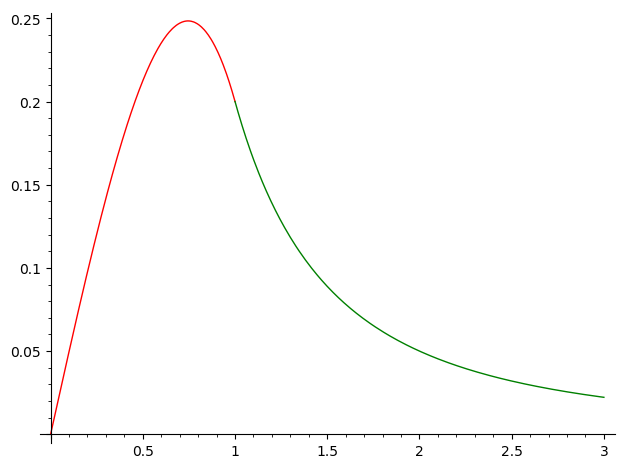

In [7]:
plt  = plot(A_solid_Inner.subs(q == 1, omega == 1, R == 1, theta_a == pi/2), (r_a, 0, 1), color='red') 
plt += plot(A_solid_Outer.subs(q == 1, omega == 1, R == 1, theta_a == pi/2), (r_a, 1, 3), color='green')
plt.show()

In [8]:
ES.<r,th,ph> = EuclideanSpace(coordinates='spherical')

F = ES.vector_field(
    function('F_r')(r,th,ph),
    function('F_theta')(r,th,ph),
    function('F_varphi')(r,th,ph),
    name='F')

from sage.manifolds.operators import *

rot_F = curl(F)

In [9]:
display(Math(latex(rot_F[1].expr())))
display(Math(latex(rot_F[2].expr())))
display(Math(latex(rot_F[3].expr())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
A_in = ES.vector_field(
    0,
    0,
    A_solid_Inner.subs(q == 1, omega == 1, R == 1, r_a == r, theta_a == th),
    name='A_in')

In [11]:
A_out = ES.vector_field(
    0,
    0,
    A_solid_Outer.subs(q == 1, omega == 1, R == 1, r_a == r, theta_a == th),
    name='A_out')

In [12]:
rot_A_in  = curl(A_in)
rot_A_out = curl(A_out)

In [13]:
print(A_out[3])

1/5*sin(th)/r^2


In [14]:
print(curl(A_in)[1])
print(curl(A_in)[2])
print(curl(A_in)[3])

-1/5*(3*r^2 - 5)*cos(th)
1/5*(6*r^2 - 5)*sin(th)
0


In [15]:
print(curl(A_out)[1])
print(curl(A_out)[2])
print(curl(A_out)[3])

2/5*cos(th)/r^3
1/5*sin(th)/r^3
0


In [16]:
rot_A_in.plot(ranges={r: (0.1, 1)}, scale=0.2, width=2)

Graphics3d Object

In [17]:
rot_A_out.plot(ranges={r: (1, 2)}, scale=0.2, width=2)

Graphics3d Object

In [18]:
#rot_A_in.plot(chart=cartesian, chart_domain=spherical, ranges={r: (2, 10)}, scale=0.2, width=2)

Теперь представляет интерес двумерная визуализация магнитного поля (ротора $A$)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xa_linspace = np.linspace(-2, +2, 20)
za_linspace = np.linspace(-2, +2, 20)

xa_list = xa_linspace.tolist()
za_list = za_linspace.tolist()

xa_grid,za_grid = np.meshgrid(xa_linspace, za_linspace)

u = xa_grid * np.nan # h_x
v = za_grid * np.nan # h_z

Ya = 0
for ix in np.arange(0, len(xa_linspace), 1):
    for iz in np.arange(0, len(za_linspace), 1):
        Xa = xa_list[ix]
        Za = za_list[iz]
        Ra = sqrt(Xa*Xa + Za*Za + Ya*Ya)
        theta_a = acos(Za/Ra)
        phi_a = atan(Ya/Xa)
        if Xa > 0:
            phi_a = 0
        else:
            phi_a = pi
        
        if Ra < 1:
            h_r     = rot_A_in[1].expr().subs(r == Ra, th == theta_a)
            h_theta = rot_A_in[2].expr().subs(r == Ra, th == theta_a)
        else:
            h_r     = rot_A_out[1].expr().subs(r == Ra, th == theta_a)
            h_theta = rot_A_out[2].expr().subs(r == Ra, th == theta_a)
            
        # h_x
        u[iz][ix] = h_r * sin(theta_a) + h_theta * cos(theta_a)
        if Xa < 0:
            u[iz][ix] *= -1
        
        # h_z
        v[iz][ix] = h_r * cos(theta_a) - h_theta * sin(theta_a)

In [20]:
E.<x,y> = EuclideanSpace(2)
cartesian = E.cartesian_coordinates()
polar.<r,t> = E.polar_coordinates()
R, T = E.coord_change(cartesian, polar)(x,y)
X, Y = E.coord_change(polar,cartesian)(r,t)
print(R, T)
print(X, Y)
#(sqrt(x^2 + y^2), arctan2(y, x))
b = var('b')
eq0 = r==1/(1+b*cos(t))
eq1 = eq0.subs({r: R, t: T})
eq2 = (R/eq1).expand() - 1; 
print(eq2)
#0 == b*x + sqrt(x^2 + y^2) - 1

sqrt(x^2 + y^2) arctan2(y, x)
r*cos(t) r*sin(t)
0 == b*x + sqrt(x^2 + y^2) - 1


In [21]:
line_thick = 0.005
arr_l = 0.15
arr_h = 0.025
color = "red"

def matplotlib_draw_cylinder(plt, z0 = 0):
    plt.plot(z0 + Zj1,      Rj2                 , z0 + Zj2,Rj2, marker='.', color = color)
    plt.plot(z0 + Zj2,      Rj2                 , z0 + Zj2,Rj1, marker='.', color = color, linestyle="dashed")
    plt.plot(z0 + Zj2,      Rj1                 , z0 + Zj1,Rj1, marker='.', color = color)
    plt.plot(z0 + Zj1,      Rj1                 , z0 + Zj1,Rj2, marker='.', color = color, linestyle="dashed")

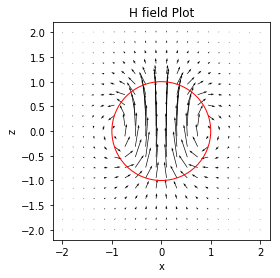

In [22]:
fig,ax=plt.subplots(1,1)
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
ax.quiver(xa_grid,za_grid,u,v)
ax.set_title('H field Plot')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.add_patch(circle1)
ax.set_aspect(aspect='equal')
plt.show()

In [23]:
u_norm = u
v_norm = v

for ix in np.arange(0, len(xa_linspace), 1):
    for iz in np.arange(0, len(za_linspace), 1):
        n = sqrt(u[iz][ix]^2 + v[iz][ix]^2)
        u_norm[iz][ix] = u[iz][ix] / n
        v_norm[iz][ix] = v[iz][ix] / n

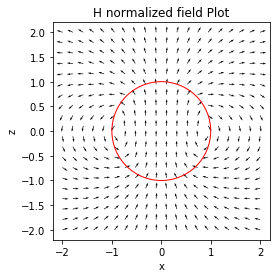

In [24]:
fig,ax=plt.subplots(1,1)
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
ax.quiver(xa_grid,za_grid,u_norm,v_norm)
ax.set_title('H normalized field Plot')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.add_patch(circle1)
ax.set_aspect(aspect='equal')
plt.show()